# Metabolic Syndrome Prediction and Healthcare Plan Recommendation

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2

# Getting the Data..

In [3]:
# Load dataset
data = pd.read_csv('dataset.csv',skiprows=1)

# Preview the dataset
data.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_3180\4278663422.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dataset.csv',skiprows=1)


,"Gender(0=female, 1=male)",Age(years),Neutrophil percentage(%),Lymphocyte percentage(%),Neutrophil count(10^9/L),Mean red blood cell volume(fL),Mean hemoglobin concentration(g/L),RBC distribution width SD,Mean platelet volume(fL),Platelet distribution width standard deviation,...,BMI(kg/m2),Waist circumference(cm),Systolic blood pressure(mmHg),Diastolic blood pressure(mmHg),Fasting blood glucose(mmol/L),Low density lipoprotein cholesterol(mmol/L),Total cholesterol(mmol/L),Triglycerides(mmol/L),High-density lipoprotein cholesterol(mmol/L),"Metabolic syndrome(0=no, 1=yes)"
0,1,53,5.7,72.6,3.40,102.4,322.0,49.6,10.4,12.3,...,19.56,66,118,65,4.61,2.74,4.00,0.91,1.29,0
1,1,54,12.6,85.0,2.47,93.1,342.0,52.1,10.5,12.8,...,22.49,81,119,70,4.82,3.36,5.11,0.99,1.43,0
2,1,34,13.8,56.0,0.43,87.2,317.0,46.2,9.6,11.1,...,22.86,73,113,71,4.58,2.93,3.90,0.83,1.33,0
3,1,31,20.0,71.9,1.71,88.4,342.0,46.2,10.8,11.9,...,20.32,62,94,60,4.22,1.94,3.56,0.94,1.45,0
4,1,59,20.3,71.1,0.82,78.0,321.0,42.3,9.4,12.3,...,29.04,95,138,73,4.66,2.25,4.29,0.76,1.50,0


# Pre-Processing

In [4]:
# 1.Drop unnecessary columns (if any)
data = data.drop(columns=['...'], errors='ignore')  # Remove placeholder if needed

In [5]:
#2.Converting Types 
data = data.apply(pd.to_numeric, errors='coerce')


In [6]:
data.head()

,"Gender(0=female, 1=male)",Age(years),Neutrophil percentage(%),Lymphocyte percentage(%),Neutrophil count(10^9/L),Mean red blood cell volume(fL),Mean hemoglobin concentration(g/L),RBC distribution width SD,Mean platelet volume(fL),Platelet distribution width standard deviation,...,BMI(kg/m2),Waist circumference(cm),Systolic blood pressure(mmHg),Diastolic blood pressure(mmHg),Fasting blood glucose(mmol/L),Low density lipoprotein cholesterol(mmol/L),Total cholesterol(mmol/L),Triglycerides(mmol/L),High-density lipoprotein cholesterol(mmol/L),"Metabolic syndrome(0=no, 1=yes)"
0,1,53,5.7,72.6,3.40,102.4,322.0,49.6,10.4,12.3,...,19.56,66,118,65,4.61,2.74,4.00,0.91,1.29,0
1,1,54,12.6,85.0,2.47,93.1,342.0,52.1,10.5,12.8,...,22.49,81,119,70,4.82,3.36,5.11,0.99,1.43,0
2,1,34,13.8,56.0,0.43,87.2,317.0,46.2,9.6,11.1,...,22.86,73,113,71,4.58,2.93,3.90,0.83,1.33,0
3,1,31,20.0,71.9,1.71,88.4,342.0,46.2,10.8,11.9,...,20.32,62,94,60,4.22,1.94,3.56,0.94,1.45,0
4,1,59,20.3,71.1,0.82,78.0,321.0,42.3,9.4,12.3,...,29.04,95,138,73,4.66,2.25,4.29,0.76,1.50,0


In [7]:
data.dtypes.to_frame()

,0
"Gender(0=female, 1=male)",int64
Age(years),int64
Neutrophil percentage(%),float64
Lymphocyte percentage(%),float64
Neutrophil count(10^9/L),float64
Mean red blood cell volume(fL),float64
Mean hemoglobin concentration(g/L),float64
RBC distribution width SD,float64
Mean platelet volume(fL),float64
Platelet distribution width standard deviation,float64


In [8]:
# 3.Normalize numerical features
scaler = StandardScaler()
data.iloc[:, 1:-1] = scaler.fit_transform(data.iloc[:, 1:-1])  # Exclude target column from scaling


In [9]:
# 4.Missing Values
data.isnull().sum().to_frame()

,0
"Gender(0=female, 1=male)",0
Age(years),0
Neutrophil percentage(%),0
Lymphocyte percentage(%),0
Neutrophil count(10^9/L),0
Mean red blood cell volume(fL),0
Mean hemoglobin concentration(g/L),0
RBC distribution width SD,0
Mean platelet volume(fL),0
Platelet distribution width standard deviation,0


In [10]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum().to_frame()

,0
"Gender(0=female, 1=male)",0
Age(years),0
Neutrophil percentage(%),0
Lymphocyte percentage(%),0
Neutrophil count(10^9/L),0
Mean red blood cell volume(fL),0
Mean hemoglobin concentration(g/L),0
RBC distribution width SD,0
Mean platelet volume(fL),0
Platelet distribution width standard deviation,0


In [12]:
target_col = 'Metabolic syndrome(0=no, 1=yes)'  
if target_col not in data.columns:
    raise ValueError(f"Target column '{target_col}' not found in the dataset.")

# Module -1

# Feature Selection

# 1. Filter Method

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, chi2, VarianceThreshold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.feature_selection import SelectKBest

# Pre-Processing

In [14]:
# Separate features and target variable
X = data.drop(columns=[target_col])  # Features
y = data[target_col]  # Target variable

In [15]:
# Encode target if necessary (assuming binary classification)
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

In [16]:
# Min-Max Scaling for Normalization
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import mutual_info_classif

# Step 1: Define Features and Target
X = data.drop(columns=['Metabolic syndrome(0=no, 1=yes)'])
y = data['Metabolic syndrome(0=no, 1=yes)']

# Step 2: Split Data with Stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Compute Mutual Information Scores
mi_scores = mutual_info_classif(X_train, y_train)
mi_scores_df = pd.DataFrame({'Feature': X_train.columns, 'MI_Score': mi_scores})

# Step 4: Select Features Based on MI Threshold
threshold = 0.05  # adjust this as needed
selected_features = mi_scores_df[mi_scores_df['MI_Score'] > threshold]['Feature'].tolist()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print("Selected Features based on Mutual Information Threshold:")
print(selected_features)

# Step 5: Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected, y_train)

# Step 6: Evaluate the Model
y_pred = rf_model.predict(X_test_selected)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Selected Features based on Mutual Information Threshold:
['Glutamyl transpeptidase(U/L)', 'Previous fatty liver (0=no, 1=yes)', 'BMI(kg/m2)', 'Waist circumference(cm)', 'Systolic blood pressure(mmHg)', 'Diastolic blood pressure(mmHg)', 'Fasting blood glucose(mmol/L)', 'Triglycerides(mmol/L)', 'High-density lipoprotein cholesterol(mmol/L)']
Accuracy: 0.9880629408572978
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1528
           1       0.99      0.94      0.96       315

    accuracy                           0.99      1843
   macro avg       0.99      0.97      0.98      1843
weighted avg       0.99      0.99      0.99      1843



In [29]:
len(selected_features)

9

In [30]:

# Step 4: Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected, y_train)

# Step 5: Model Evaluation
y_pred = rf_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9881
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1528
           1       0.99      0.94      0.96       315

    accuracy                           0.99      1843
   macro avg       0.99      0.97      0.98      1843
weighted avg       0.99      0.99      0.99      1843



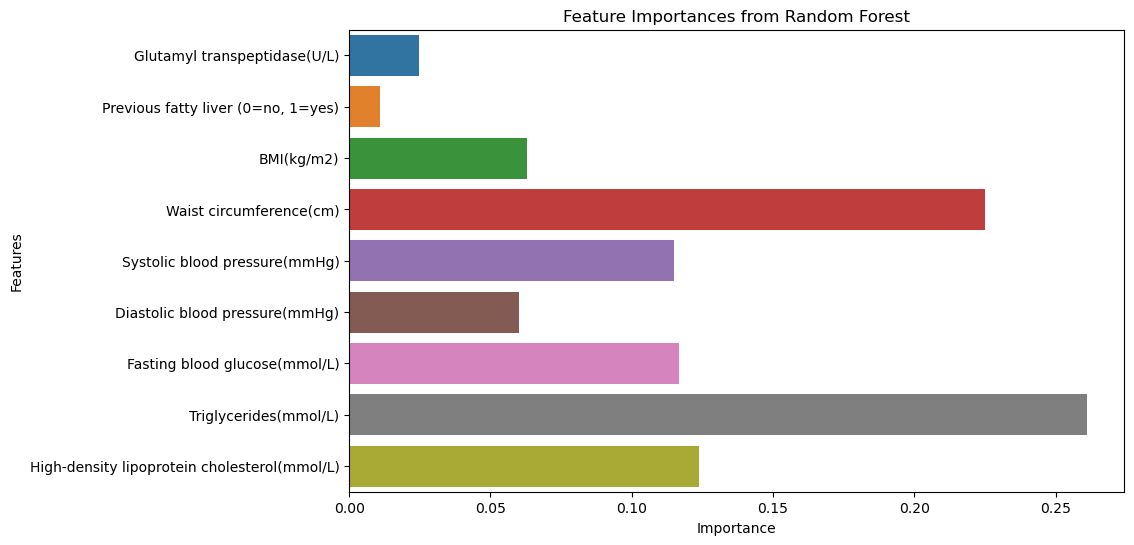

In [31]:

# Optional: Visualize Feature Importances
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=selected_features)
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


# 2.Wrapper Method (GA)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Step 7: Genetic Algorithm for Feature Selection
def init_population(n, c):
    """
    Initialize a binary-encoded population.
    Args:
        n: Number of individuals (population size)
        c: Number of features
    Returns:
        Initial population as a numpy array
    """
    return np.random.randint(2, size=(n, c))  # n individuals, c features

def single_point_crossover(population):
    """
    Perform single-point crossover between pairs of individuals.
    """
    r, c = population.shape
    for i in range(0, r, 2):
        if i + 1 < r:  # Ensure valid pair
            n = np.random.randint(1, c)  # Random crossover point
            temp = population[i][:n].copy()
            population[i][:n] = population[i + 1][:n]
            population[i + 1][:n] = temp
    return population

def flip_mutation(population, mutation_rate=0.1):
    """
    Apply flip mutation with a fixed mutation rate.
    """
    mutation_indices = np.random.rand(*population.shape) < mutation_rate
    population[mutation_indices] = 1 - population[mutation_indices]  # Flip bits
    return population

def get_fitness(X, y, population, feature_names):
    """
    Evaluate the fitness of each individual in the population using Random Forest.
    Args:
        X: Input features
        y: Target variable
        population: Binary-encoded population
        feature_names: List of all feature names
    Returns:
        List of fitness scores for the population
    """
    fitness = []
    for individual in population:
        # Select features corresponding to 1s in the binary encoding
        selected_features = [feature_names[i] for i in range(len(feature_names)) if individual[i] == 1]
        if not selected_features:  # If no features selected, fitness = 0
            fitness.append(0)
            continue
        
        # Train and evaluate Random Forest model with selected features
        X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)
        accuracy = accuracy_score(y_test, rf.predict(X_test))
        fitness.append(accuracy)
    return fitness

def genetic_algorithm(X, y, feature_names, n_generations=20, population_size=10, mutation_rate=0.1):
    """
    Genetic Algorithm to optimize feature selection.
    Args:
        X: Input features
        y: Target variable
        feature_names: List of all feature names
        n_generations: Number of generations
        population_size: Size of the population
        mutation_rate: Mutation rate
    Returns:
        Best feature subset and its fitness score
    """
    num_features = len(feature_names)
    population = init_population(population_size, num_features)
    
    best_solution = None
    best_score = 0

    for generation in range(n_generations):
        print(f"Generation {generation + 1}")
        fitness = get_fitness(X, y, population, feature_names)
        
        # Find the best individual in this generation
        max_fitness = max(fitness)
        if max_fitness > best_score:
            best_score = max_fitness
            best_solution = population[fitness.index(max_fitness)].copy()
        
        print(f"  Best Fitness in Generation {generation + 1}: {max_fitness:.4f}")
        
        # Select the top 50% individuals to form the next generation
        sorted_indices = np.argsort(fitness)[::-1]
        top_individuals = population[sorted_indices[:population_size // 2]]

        # Generate new population via crossover and mutation
        population = single_point_crossover(np.vstack([top_individuals] * 2))  # Duplicate for crossover
        population = flip_mutation(population, mutation_rate)

    # Decode the best solution
    selected_features = [feature_names[i] for i in range(num_features) if best_solution[i] == 1]
    print("\nBest Feature Subset Found by Genetic Algorithm:")
    print(selected_features)
    print(f"Best Fitness Score: {best_score:.4f}")
    
    return selected_features, best_score

# Combine selected training and test data for GA input
X_selected_all = pd.concat([X_train_selected, X_test_selected])
y_selected_all = pd.concat([y_train, y_test])
feature_names = X_train_selected.columns.tolist()

best_features, best_fitness = genetic_algorithm(X_selected_all, y_selected_all, feature_names)


Generation 1
  Best Fitness in Generation 1: 0.9799
Generation 2
  Best Fitness in Generation 2: 0.9805
Generation 3
  Best Fitness in Generation 3: 0.9891
Generation 4
  Best Fitness in Generation 4: 0.9891
Generation 5
  Best Fitness in Generation 5: 0.9891
Generation 6
  Best Fitness in Generation 6: 0.9805
Generation 7
  Best Fitness in Generation 7: 0.9702
Generation 8
  Best Fitness in Generation 8: 0.9870
Generation 9
  Best Fitness in Generation 9: 0.9881
Generation 10
  Best Fitness in Generation 10: 0.9891
Generation 11
  Best Fitness in Generation 11: 0.9891
Generation 12
  Best Fitness in Generation 12: 0.9875
Generation 13
  Best Fitness in Generation 13: 0.9891
Generation 14
  Best Fitness in Generation 14: 0.9875
Generation 15
  Best Fitness in Generation 15: 0.9881
Generation 16
  Best Fitness in Generation 16: 0.9891
Generation 17
  Best Fitness in Generation 17: 0.9891
Generation 18
  Best Fitness in Generation 18: 0.9875
Generation 19
  Best Fitness in Generation 19:

In [33]:
len(best_features)

8

In [35]:
# Step 9: Evaluate the Final Model with Selected Features
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_all[best_features], y_selected_all, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("\nFinal Evaluation with Selected Features:")
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))



Final Evaluation with Selected Features:
Accuracy on Test Set: 0.989148128052089


In [36]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import pandas as pd
import numpy as np

# Ensure NumPy compatibility
np.complex128  # Explicit check for compatibility


# Load and preprocess dataset
data = pd.read_csv('dataset.csv', skiprows=1, low_memory=False)
data = data.apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)


columns_to_extract = [
    'Glutamyl transpeptidase(U/L)',
    'BMI(kg/m2)',
    'Waist circumference(cm)',
    'Systolic blood pressure(mmHg)',
    'Diastolic blood pressure(mmHg)',
    'Fasting blood glucose(mmol/L)',
    'Triglycerides(mmol/L)',
    'High-density lipoprotein cholesterol(mmol/L)',
    'Metabolic syndrome(0=no, 1=yes)'
]


features_extracted = data[columns_to_extract]
features_extracted.head()

,Glutamyl transpeptidase(U/L),BMI(kg/m2),Waist circumference(cm),Systolic blood pressure(mmHg),Diastolic blood pressure(mmHg),Fasting blood glucose(mmol/L),Triglycerides(mmol/L),High-density lipoprotein cholesterol(mmol/L),"Metabolic syndrome(0=no, 1=yes)"
9,23.0,21.68,75,133,85,5.31,0.67,0.81,0
16,14.0,20.08,65,99,56,4.90,1.19,1.17,0
25,10.0,19.95,65,106,60,4.28,0.40,1.92,0
30,19.0,22.38,75,100,60,5.70,0.88,1.56,0
33,13.0,19.10,63,103,62,4.53,0.95,1.68,0


In [37]:
features_extracted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9215 entries, 9 to 39120
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Glutamyl transpeptidase(U/L)                  9215 non-null   float64
 1   BMI(kg/m2)                                    9215 non-null   float64
 2   Waist circumference(cm)                       9215 non-null   int64  
 3   Systolic blood pressure(mmHg)                 9215 non-null   int64  
 4   Diastolic blood pressure(mmHg)                9215 non-null   int64  
 5   Fasting blood glucose(mmol/L)                 9215 non-null   float64
 6   Triglycerides(mmol/L)                         9215 non-null   float64
 7   High-density lipoprotein cholesterol(mmol/L)  9215 non-null   float64
 8   Metabolic syndrome(0=no, 1=yes)               9215 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 719.9 KB


# Module -2 

# Auto-Encoders Pre-Training

In [38]:
from keras.models import Model
from keras.layers import Input, Dense

# Autoencoder for dimensionality reduction
input_dim = X_train.shape[1]
encoding_dim = 6  # Reduced dimensionality

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=8, shuffle=True, validation_split=0.2, verbose=0)

# Encoder for dimensionality reduction
encoder = Model(input_layer, encoded)
compressed_features = encoder.predict(normalized_features)


NameError: name 'normalized_features' is not defined

In [ ]:
compressed_features

# Constructing Bayesian Network (Hill Climb Search & BIC Score) - Basic

In [39]:
from pgmpy.estimators import MaximumLikelihoodEstimator, HillClimbSearch, BicScore
from pgmpy.inference import VariableElimination

estimator = HillClimbSearch(features_extracted)
best_model = estimator.estimate(scoring_method=BicScore(features_extracted))
features_extracted.head()


  0%|          | 0/1000000 [00:00<?, ?it/s]

,Glutamyl transpeptidase(U/L),BMI(kg/m2),Waist circumference(cm),Systolic blood pressure(mmHg),Diastolic blood pressure(mmHg),Fasting blood glucose(mmol/L),Triglycerides(mmol/L),High-density lipoprotein cholesterol(mmol/L),"Metabolic syndrome(0=no, 1=yes)"
9,23.0,21.68,75,133,85,5.31,0.67,0.81,0
16,14.0,20.08,65,99,56,4.90,1.19,1.17,0
25,10.0,19.95,65,106,60,4.28,0.40,1.92,0
30,19.0,22.38,75,100,60,5.70,0.88,1.56,0
33,13.0,19.10,63,103,62,4.53,0.95,1.68,0


In [40]:
print("Learned Structure:")
print(best_model.edges())


Learned Structure:
[('Waist circumference(cm)', 'Metabolic syndrome(0=no, 1=yes)'), ('Metabolic syndrome(0=no, 1=yes)', 'Diastolic blood pressure(mmHg)'), ('Metabolic syndrome(0=no, 1=yes)', 'Systolic blood pressure(mmHg)')]


In [41]:
extracted_edges = best_model.edges()
for i in extracted_edges:
    print(i)

('Waist circumference(cm)', 'Metabolic syndrome(0=no, 1=yes)')
('Metabolic syndrome(0=no, 1=yes)', 'Diastolic blood pressure(mmHg)')
('Metabolic syndrome(0=no, 1=yes)', 'Systolic blood pressure(mmHg)')


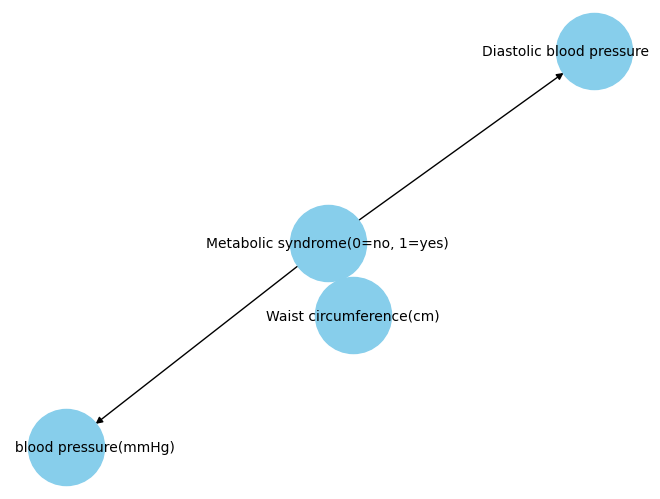

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

graph = nx.DiGraph(best_model.edges())
nx.draw(graph, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_color='black')
plt.show()

In [43]:
model = BayesianNetwork(best_model.edges())

# Use Maximum Likelihood Estimator to estimate the parameters (CPDs)
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Perform inference using Variable Elimination
inference = VariableElimination(model)


In [44]:
extracted_edges = best_model.edges()
for i in extracted_edges:
    print(i)

('Waist circumference(cm)', 'Metabolic syndrome(0=no, 1=yes)')
('Metabolic syndrome(0=no, 1=yes)', 'Diastolic blood pressure(mmHg)')
('Metabolic syndrome(0=no, 1=yes)', 'Systolic blood pressure(mmHg)')


In [45]:
hill_climb_features = [
    'Previous fatty liver (0=no, 1=yes)',
    'Previous hypertension(0=no, 1=yes)',
    
    'Waist circumference(cm)',
    'Systolic blood pressure(mmHg)',
    'Diastolic blood pressure(mmHg)'
]

In [46]:
evidence = {
    'Previous fatty liver (0=no, 1=yes)': 1,
    'Previous hypertension(0=no, 1=yes)': 0,
    'Previous diabetes(0=no, 1=yes)': 1,
    'Waist circumference(cm)': 76,
    'Systolic blood pressure(mmHg)': 139,
    'Diastolic blood pressure(mmHg)': 88
}


In [47]:
# Example inference: Given certain conditions (e.g., a person has high blood pressure, what is the probability of having metabolic syndrome?)
query_result = inference.query(variables=['Metabolic syndrome(0=no, 1=yes)'],
                               evidence=evidence)
print(query_result)

ValueError: Node Previous fatty liver (0=no, 1=yes) not in not in graph

In [175]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator, HillClimbSearch, BicScore
from pgmpy.inference import VariableElimination

# Load and preprocess dataset
data = pd.read_csv('dataset.csv', skiprows=1, low_memory=False)
data = data.apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)

# Selected features for Bayesian Network Structure Learning
hill_climb_features = [
    'Previous fatty liver (0=no, 1=yes)',
    'Previous hypertension(0=no, 1=yes)',
    'Previous diabetes(0=no, 1=yes)',
    'Waist circumference(cm)',
    'Systolic blood pressure(mmHg)',
    'Diastolic blood pressure(mmHg)',
    'Metabolic syndrome(0=no, 1=yes)'
]

data = data[hill_climb_features]

# Learn Bayesian Network Structure
estimator = HillClimbSearch(data)
best_model = estimator.estimate(scoring_method=BicScore(data))
model = BayesianNetwork(best_model.edges())

# Fit model using Maximum Likelihood Estimation
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Perform inference
inference = VariableElimination(model)

# Evaluate model accuracy
correct_predictions = 0
total_samples = len(data)

for index, row in data.iterrows():
    evidence = row.drop(labels=['Metabolic syndrome(0=no, 1=yes)']).to_dict()
    actual_value = row['Metabolic syndrome(0=no, 1=yes)']
    
    # Get probability distribution
    query_result = inference.query(variables=['Metabolic syndrome(0=no, 1=yes)'], evidence=evidence)
    predicted_prob = query_result.values[1]  # Probability of '1'
    predicted_value = 1 if predicted_prob > 0.6 else 0
    
    if predicted_value == actual_value:
        correct_predictions += 1



  0%|          | 0/1000000 [00:00<?, ?it/s]

In [176]:

# Calculate accuracy
accuracy = correct_predictions / total_samples
print(f'Model Accuracy: {accuracy:.4f}')

Model Accuracy: 0.8786


In [177]:
# Save the trained model
import pickle

with open('bayesian_network_model.pkl', 'wb') as f:
    pickle.dump(model, f)